In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow version:{}'.format(tf.__version__))

Tensorflow version:2.3.1


In [3]:
# 测试gpu是否可以使用
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
# 加载fashion_mnist数据集
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [6]:
# 对图片数据进行扩维
train_images = np.expand_dims(train_images,-1) # 在最后一个维度上进行扩张

In [7]:
test_images = np.expand_dims(test_images,-1) # 在最后一个维度上进行扩张

In [8]:
model= tf.keras.Sequential() # 顺序模型
# 第一层使用卷积层，卷积层提取图片特征的能力强   32-fliter个数  (3,3)-卷积核大小，一般使用3*3或5*5  input_shape-图片大小
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=train_images.shape[1:],activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
# 最大池化层
model.add(tf.keras.layers.MaxPool2D())
# 抑制过拟合
model.add(tf.keras.layers.Dropout(0.5))
# 卷积核以2的指数增长
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
# 最大池化层
model.add(tf.keras.layers.MaxPool2D())
# 抑制过拟合
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
# 抑制过拟合
model.add(tf.keras.layers.Dropout(0.5))
# 全局平均池化：得到一个二维的数据
model.add(tf.keras.layers.GlobalAveragePooling2D())
# Dense 输出层：输出一个维度为10的数据  softmax:输出概率值
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

In [10]:
# 对模型进行配置
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [11]:
history = model.fit(train_images,train_labels,epochs=30,validation_data = (test_images,test_labels))

Epoch 1/30
1875/1875 [==============================] - 895s 478ms/step - loss: 0.8041 - acc: 0.7017 - val_loss: 0.4595 - val_acc: 0.8395
Epoch 2/30
1875/1875 [==============================] - 947s 505ms/step - loss: 0.4316 - acc: 0.8399 - val_loss: 0.3974 - val_acc: 0.8531
Epoch 3/30
1875/1875 [==============================] - 812s 433ms/step - loss: 0.3675 - acc: 0.8648 - val_loss: 0.3175 - val_acc: 0.8822
Epoch 4/30
1875/1875 [==============================] - 769s 410ms/step - loss: 0.3327 - acc: 0.8777 - val_loss: 0.3256 - val_acc: 0.8787
Epoch 5/30
1875/1875 [==============================] - 79847s 43s/step - loss: 0.3136 - acc: 0.8835 - val_loss: 0.3146 - val_acc: 0.8879
Epoch 6/30
1875/1875 [==============================] - 963s 514ms/step - loss: 0.2949 - acc: 0.8916 - val_loss: 0.2640 - val_acc: 0.9038
Epoch 7/30
1875/1875 [==============================] - 906s 483ms/step - loss: 0.2826 - acc: 0.8955 - val_loss: 0.2964 - val_acc: 0.8886
Epoch 8/30
1875/1875 [============

In [13]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

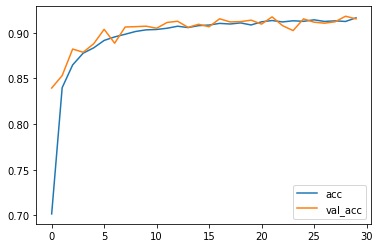

In [14]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

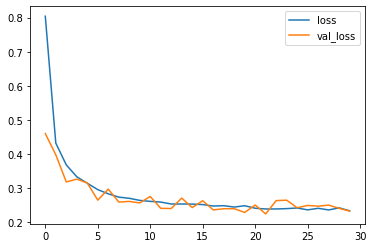

In [15]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()